In [106]:
import pandas as pd

dataset = pd.read_csv("CPU_prices_Desktop_Mobile.csv")

Оставим только процессоры для ПК. Для этого удалим все строки где DorM = 0  

In [107]:
for index, row in dataset.iterrows():
    if row["DorM"] == 0:
        dataset = dataset.drop(index)
dataset.index = [index for index in range(len(dataset))]

Теперь колонка  DorM не требуется

In [108]:
dataset.drop("DorM", axis=1, inplace=True)
dataset.drop("Name", axis=1, inplace=True)
dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())
dataset = (dataset - dataset.mean()) / dataset.std()

In [109]:
dataset.to_csv("Desktop_CPU_prices.csv")

Лабораторная работа 2

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

new_dataset = pd.read_csv("Desktop_CPU_prices.csv")

In [111]:
x = np.array(new_dataset["Cache(M)"]).reshape(-1, 1)
y = np.array(new_dataset["Price"]).reshape(-1, 1)

In [112]:
DEGREES = 2
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 0.07074884449288024


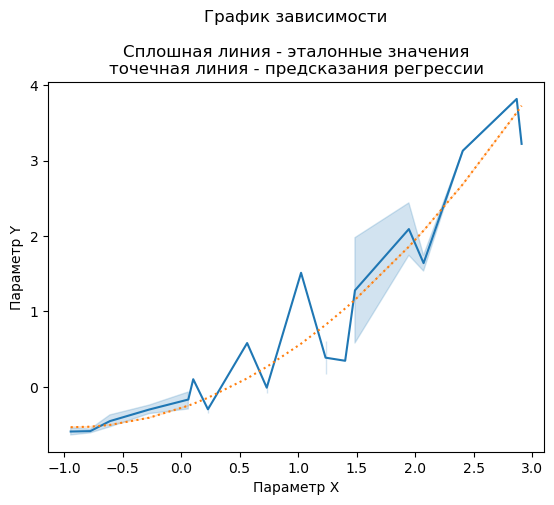

In [113]:
sns.lineplot(
 x=new_dataset["Cache(M)"],
 y=new_dataset["Price"],
 linestyle="solid"
)
sns.lineplot(
 x=new_dataset["Cache(M)"],
 y=predictions.reshape(-1),
 linestyle="dotted"
)
plt.title(
 'График зависимости\n\n'
 'Сплошная линия - эталонные значения\n'
 'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [114]:
x_parameters = np.append(
 regression['linearregression'].intercept_[0],
 regression['linearregression'].coef_[0][1:]
)
x_parameters

array([-0.28623193,  0.53966917,  0.2888106 ])

Лабораторная работа 3

<Axes: >

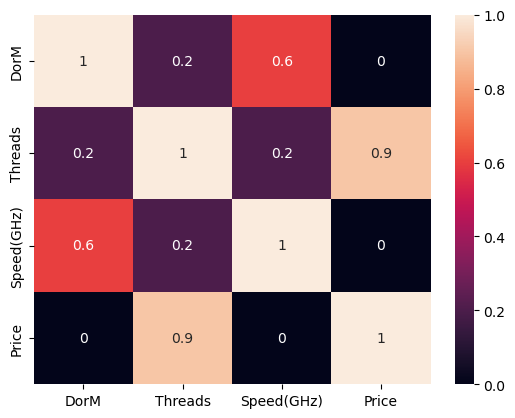

In [115]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

dataset = pd.read_csv("CPU_prices_Desktop_Mobile.csv")
dataset.drop("Name", axis=1, inplace=True)

dataset.drop("Cache(M)", axis=1, inplace=True)
dataset.drop("Cores", axis=1, inplace=True)



sns.heatmap(
 round(
 abs(dataset.corr()),
 1,
 ),
 annot=True,
)

In [116]:
train_input, test_input, train_output, test_output = train_test_split(
 dataset.drop('DorM', axis=1),
 dataset["DorM"],
 test_size=0.2
)

model = GaussianNB()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")


Точность модели на тестовом участке = 0.8444444444444444
